# Decision Tree Modelling

In [1979]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [1980]:
df = pd.read_excel('Cleaned_Data.xlsx')
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Family_Size,Total_Spent,BuyingPower
0,0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,...,4,4,6,1,1,0,54,1,198.333333,0.002338
1,1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,...,7,3,7,5,1,0,63,1,96.166667,0.001684
2,2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,...,3,2,5,2,0,0,66,3,41.833333,0.000622
3,3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,...,1,0,2,7,0,0,57,4,1.833333,0.000056
4,4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,...,3,1,2,7,1,0,35,2,15.166667,0.000706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03,99,...,5,2,11,4,0,0,48,2,114.833333,0.001727
2230,2236,5263,1977,TwoN_Cycle,Married,31056.0,1,0,2013-01-22,99,...,1,0,3,8,0,0,47,3,9.166667,0.000295
2231,2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12,99,...,6,1,5,8,0,0,48,2,51.500000,0.001112
2232,2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,...,5,4,10,3,0,0,46,2,230.500000,0.003502


In [1981]:
selected_columns = [
    'Age',
    'Marital_Status',
    'Education',
    'Income', 
    'Kidhome', 
    'Teenhome',
    'Recency',
    # 'Dt_Customer',
    # 'MntFishProducts', 
    'MntMeatProducts', 
    # 'MntFruits', 
    # 'MntSweetProducts', 
    'MntWines', 
    # 'MntGoldProds',
    'NumDealsPurchases',
    # 'NumWebPurchases',
    # 'NumCatalogPurchases',
    # 'NumStorePurchases',
    # 'NumWebVisitsMonth',
    'Family_Size',
    # 'Total_Spent',
    # 'BuyingPower',
    'Response',
    # 'Complain'
]
df = df[selected_columns]

In [1982]:
def one_hot_encode(data, column, suffix=''):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded, lsuffix='_data', rsuffix='_encoded')
    # data = data.join(encoded)
    return data
df = one_hot_encode(df, 'Marital_Status')
df = one_hot_encode(df, 'Education')

# from sklearn.calibration import LabelEncoder


# le_Education = LabelEncoder()
# le_Marital_Status = LabelEncoder()

# df['Marital_Status'] = le_Marital_Status.fit_transform(df['Marital_Status'])
# df['Education'] = le_Education.fit_transform(df['Education'])

# df

In [1983]:
# sample = df[~(df['Single'] | df['Married'] | df['Together'] | df['Widow'])]
# sample

In [1984]:
from scipy import stats


z_age = np.abs(stats.zscore(df['Age']))
z_income = np.abs(stats.zscore(df['Income']))
# z_MntMeatProducts = np.abs(stats.zscore(df['MntMeatProducts']))
# z_MntSweetProducts = np.abs(stats.zscore(df['MntSweetProducts']))
# z_MntGoldProducts = np.abs(stats.zscore(df['Income']))
# z_buying_power = np.abs(stats.zscore(df['BuyingPower']))
threshold_z = 3


print("Original DataFrame Shape:", df.shape)
age_outlier_indices = np.where(z_age > threshold_z)[0]
income_outlier_indices = np.where(z_income > threshold_z)[0]
# meat_indices = np.where(z_MntMeatProducts > threshold_z)[0]
# gold_indices = np.where(z_MntGoldProducts > threshold_z)[0]
# sweet_indices = np.where(z_MntSweetProducts > threshold_z)[0]
# income_buying_power = np.where(z_income > threshold_z)[0]

outlier_indices = np.array(list(set(age_outlier_indices) | set(income_outlier_indices)))

df = df.drop(outlier_indices)
print("DataFrame Shape after Removing Outliers:", df.shape)

# df

Original DataFrame Shape: (2234, 18)
DataFrame Shape after Removing Outliers: (2223, 18)


In [1985]:
X = df.drop('Response', axis=1)
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

oversampler = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

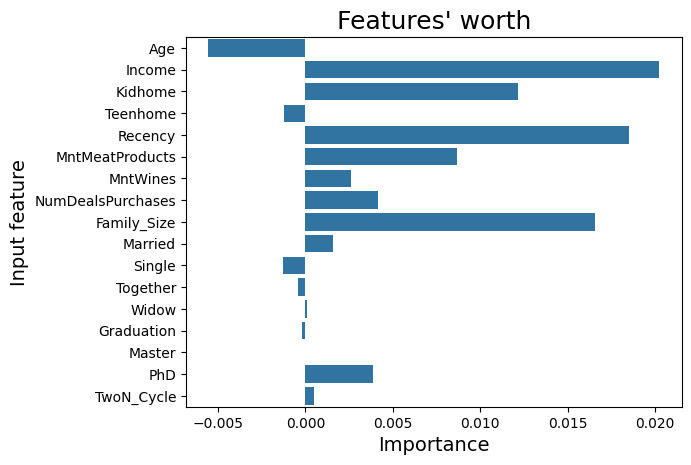

Income: 0.020239880059970038
Recency: 0.01849075462268868
Family_Size: 0.016541729135432323
Kidhome: 0.012143928035982037
MntMeatProducts: 0.008645677161419311
NumDealsPurchases: 0.004147926036981535
PhD: 0.003848075962019019
MntWines: 0.002598700649675197
Married: 0.0015992003998001232
TwoN_Cycle: 0.0004997501249375295
Widow: 9.995002498750516e-05
Master: 0.0
Graduation: -0.0001999000499749955
Together: -0.00039980009995001323
Teenhome: -0.0011994002998500398
Single: -0.0012993503248375634
Age: -0.005547226386806559


In [1986]:
# Create a ColumnTransformer for scaling
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline


# Define a ColumnTransformer for scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)
    ])

# Use a pipeline to include the preprocessing step and the logistic regression model
pipeline = Pipeline([
    # ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Fit the pipeline
pipeline.fit(X_train_resampled, y_train_resampled)

# Now, use the pipeline for permutation importance
result = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=0)

feature_importances = result.importances_mean
feature_indices = np.argsort(feature_importances)[::-1]

sns.barplot(y=X.columns, x=feature_importances)
plt.title("Features' worth", fontsize=18)
plt.ylabel("Input feature", fontsize=14)
plt.xlabel("Importance", fontsize=14)

plt.show()

# Print feature importance ranking
for idx in feature_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]}")

In [1987]:
# scaler = StandardScaler()
# X_train_resampled = scaler.fit_transform(X_train_resampled)

# Define the parameter grid
# param_grid = {
#     'max_depth': [5, 10, 15],
#     'max_leaf_nodes': [5, 10, 20, 30],
#     'min_samples_split': [2, 5, 10, 14],
#     'min_samples_leaf': [1, 2, 4, 7]
# }

# # Create the decision tree classifier
# dt_classifier = DecisionTreeClassifier(random_state=0, criterion='entropy')

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='f1')
# grid_search.fit(X_train_resampled, y_train_resampled)

# # Get the best hyperparameters
# best_params = grid_search.best_params_

# print(best_params)

clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=5,
  max_leaf_nodes=10,
  min_samples_split=5, 
  min_samples_leaf=2)

In [1988]:
# clf = LogisticRegression(random_state=0, C=best_params['C'], penalty=best_params['penalty'])
clf.fit(X_train_resampled, y_train_resampled)
train_preds = clf.predict(X_train_resampled)
preds = clf.predict(X_test)

## Train Scores

In [1989]:
acc = accuracy_score(y_train_resampled, train_preds)
prec = precision_score(y_train_resampled, train_preds)
rec = recall_score(y_train_resampled, train_preds)
f1 = f1_score(y_train_resampled, train_preds)
auc = roc_auc_score(y_train_resampled, train_preds)

In [1990]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.7753
Precision: 0.8015
Recall: 0.7319
F1: 0.7651
AUC: 0.7753


## Test Scores

In [1991]:
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc = roc_auc_score(y_test, preds)

In [1992]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.8081
Precision: 0.4110
Recall: 0.6768
F1: 0.5115
AUC: 0.7539


In [1993]:
# from sklearn.tree import plot_tree


# plt.figure(figsize=(100,100))
# plot_tree(clf, 
#           feature_names = list(X.columns),
#           class_names = ['No', 'Yes'],
#           filled = True)
# plt.show()

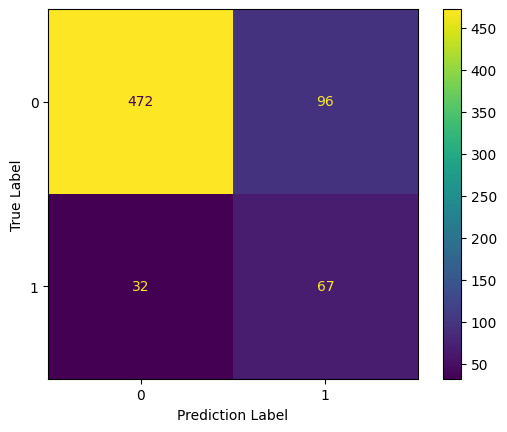

In [1994]:
cm = confusion_matrix(y_test, preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
# plt.title('Did the customer say yes?')
plt.xlabel('Prediction Label')
plt.ylabel('True Label')
plt.show()

In [1995]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': preds})
incorrect_predictions = results_df[results_df['Actual'] != results_df['Predicted']]
all_incorrect_rows = df.iloc[incorrect_predictions.index]
all_incorrect_rows = pd.merge(incorrect_predictions, df, left_index=True, right_index=True)

# Display Rows for Incorrect Predictions
print("Rows with Incorrect Predictions:")
all_incorrect_rows[0:20]

Rows with Incorrect Predictions:


,Actual,Predicted,Age,Income,Kidhome,Teenhome,Recency,MntMeatProducts,MntWines,NumDealsPurchases,Family_Size,Response,Married,Single,Together,Widow,Graduation,Master,PhD,TwoN_Cycle
364,0,1,34,18929.0,0,0,15,8,32,1,2,0,True,False,False,False,True,False,False,False
34,0,1,34,18351.0,0,0,1,9,1,1,2,0,True,False,False,False,True,False,False,False
313,0,1,54,62466.0,0,1,13,259,129,5,3,0,True,False,False,False,False,False,False,True
237,0,1,51,43050.0,1,0,10,24,30,2,3,0,True,False,False,False,False,False,False,True
421,0,1,73,39767.0,0,0,18,204,113,2,2,0,False,False,True,False,False,True,False,False
337,0,1,51,37401.0,1,0,14,19,19,2,3,0,True,False,False,False,False,False,True,False
261,0,1,38,41411.0,0,0,11,38,37,1,1,0,False,False,False,False,True,False,False,False
126,0,1,48,53359.0,1,1,4,30,173,4,4,0,True,False,False,False,True,False,False,False
398,0,1,53,36230.0,1,0,17,30,14,1,2,0,False,True,False,False,False,True,False,False
574,1,0,80,80589.0,0,0,25,520,507,1,2,1,True,False,False,False,True,False,False,False
